In [23]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

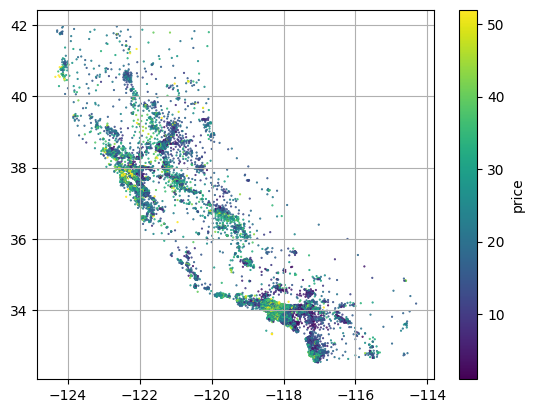

In [2]:
X, Y = sklearn.datasets.fetch_california_housing(return_X_y=True,as_frame=True)

print(X)

plt.scatter(X['Longitude'], X['Latitude'], c=X['HouseAge'], cmap='viridis', s=0.3)

cbar = plt.colorbar()
cbar.set_label('price')

plt.legend
plt.grid()
plt.show()

In [55]:
# setting up the model:
tf.random.set_seed(42)

model = Sequential()
model.add(InputLayer(shape=[8]))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,601 (21.88 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005),
              loss='mse',
              metrics=['RootMeanSquaredError'])

Epoch 1/40


331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - RootMeanSquaredError: 0.7088 - loss: 0.5025 - val_RootMeanSquaredError: 0.7137 - val_loss: 0.5094
Epoch 2/40
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - RootMeanSquaredError: 0.7644 - loss: 0.5847 - val_RootMeanSquaredError: 0.7291 - val_loss: 0.5316
Epoch 3/40
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - RootMeanSquaredError: 0.7406 - loss: 0.5487 - val_RootMeanSquaredError: 0.7649 - val_loss: 0.5851
Epoch 4/40
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - RootMeanSquaredError: 0.7314 - loss: 0.5351 - val_RootMeanSquaredError: 0.7239 - val_loss: 0.5240
Epoch 5/40
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - RootMeanSquaredError: 0.8292 - loss: 0.6919 - val_RootMeanSquaredError: 0.8705 - val_loss: 0.7577
Epoch 6/40
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - RootMeanSquaredError: 0.7391 - loss: 0.5475 - val_RootMeanSquaredError: 0.7557 - val_loss: 0.5711
Epoch 7/40
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - RootMeanSquaredError: 0.7649 - 

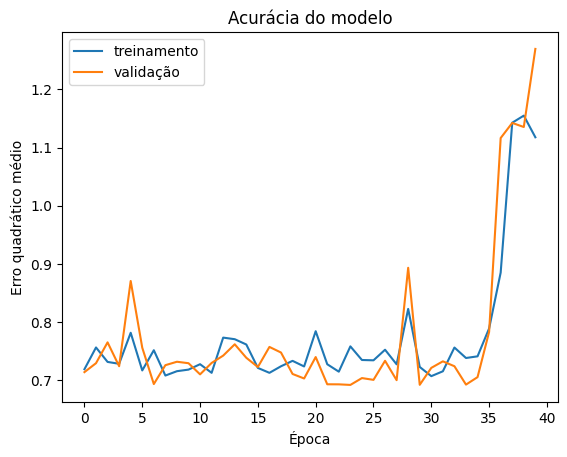

In [60]:
# training the model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)

history = model.fit(x_train, y_train, epochs=40, batch_size=50, validation_data=(x_test, y_test))

# plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.plot(history.history['RootMeanSquaredError'], label='MSE')
plt.plot(history.history['val_RootMeanSquaredError'], label='val_MSE')

plt.title('Acurácia do modelo')
plt.ylabel('Erro quadrático médio')
plt.xlabel('Época')
plt.legend(['treinamento', 'validação'], loc='upper left')
plt.show()

In [53]:
# testing the model on some random data points
pred = model.predict(x_val)

for i in range(len(y_val)):
    print('Predicted: ', pred[i][0])
    print('Real: ', y_val.iloc[i])
    print('---')

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
Predicted:  -17.740341
Real:  1.875
---
Predicted:  -77.60099
Real:  3.539
---
Predicted:  -34.379623
Real:  0.964
---
Predicted:  -44.978912
Real:  1.957
---
Predicted:  -103.0101
Real:  2.264
---
Predicted:  -108.70055
Real:  1.647
---
Predicted:  -54.344585
Real:  1.021
---
Predicted:  -79.11869
Real:  0.924
---
Predicted:  -99.36435
Real:  2.496
---
Predicted:  -59.637062
Real:  1.27
---
Predicted:  -83.50583
Real:  1.773
---
Predicted:  -154.14539
Real:  3.74
---
Predicted:  -18.091326
Real:  1.65
---
Predicted:  -56.83949
Real:  1.923
---
Predicted:  -87.26969
Real:  5.00001
---
Predicted:  -25.96267
Real:  1.152
---
Predicted:  -46.441605
Real:  1.137
---
Predicted:  -23.901974
Real:  3.926
---
Predicted:  -66.38422
Real:  1.688
---
Predicted:  -96.30704
Real:  1.567
---
Predicted:  -36.403572
Real:  1.415
---
Predicted:  -48.330536
Real:  1.403
---
Predicted:  -20.04189
Real:  3.5
---
Predicted:  -78.480804
Real:  1.786
---
Predicted:  -